In [6]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.6 MB/s eta 0:00:00


In [7]:
!pip install matplotlib

In [8]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b9a2be0ea461a877c8271699917a33120e5999d5b566540d1e0254fc8a96ee65
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [9]:
!pip install numpy

In [10]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram, plot_distribution, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.primitives import Sampler
from qiskit import *
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import ZGate, MCXGate

In [11]:
def execute_circuit(qc, shots=1024, binary=False, mode="sampler", reverse=False):

    if reverse:
        qc = qc.reverse_bits()

    if mode == "sampler":

        options = {"shots": shots}

        sampler = Sampler(options=options)

        job = sampler.run(qc)
        result = job.result()

        probability_dictionary = result.quasi_dists[0]

        if binary:
            return probability_dictionary.binary_probabilities()
        else:
            return probability_dictionary

    else:
        #remember that for statevector measurements are not needed
        sv = Statevector.from_instruction(qc)
        return sv

a)

In [ ]:
def oracle(qr, ancilla, solution=None):

    qc = QuantumCircuit(qr,ancilla)
    cx_gate = MCXGate(len(qr),ctrl_state=solution)
    qc = qc.compose(cx_gate)

    qc.barrier()
    return qc

In [ ]:
def diffusion_operator(qr, ancilla, n_qubits):

    qc = QuantumCircuit(qr,ancilla)

    qc.h(qr)
    qc.x(qr[-1])

    cz = ZGate().control(n_qubits-1,ctrl_state="0"*(n_qubits-1))
    qc = qc.compose(cz)

    qc.x(qr[-1])

    qc.h(qr)

    qc.barrier()

    return qc

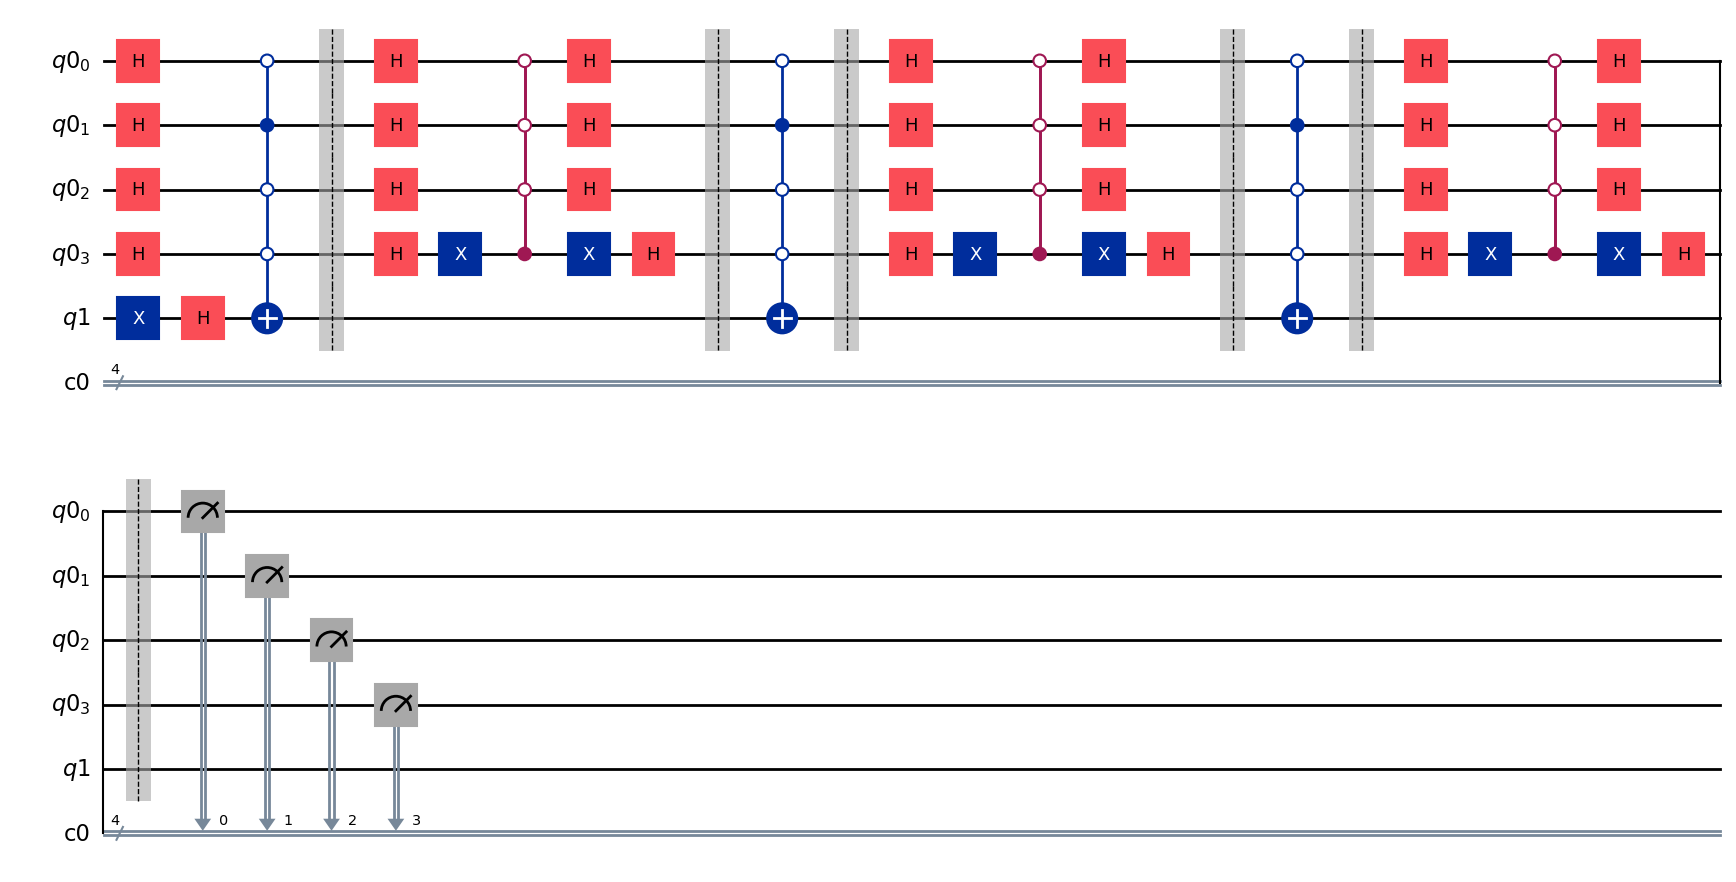

In [ ]:
# Número de qubits
n = 4

# Nr de combinações possiveis
elements = 2**n

# Iterações do ciclo
iterations= int(np.floor(np.pi/4 * np.sqrt(elements)))


qr=QuantumRegister(n)

ancilla=QuantumRegister(1)

cr=ClassicalRegister(n)

qc = QuantumCircuit(qr,ancilla,cr)

qc.h(qr)

qc.x(ancilla)
qc.h(ancilla)

for j in range(iterations):
    qc = qc.compose(oracle(qr,ancilla,solution="0010"))
    qc = qc.compose(diffusion_operator(qr,ancilla,n))


qc.measure(qr,cr)
qc.draw(output="mpl")

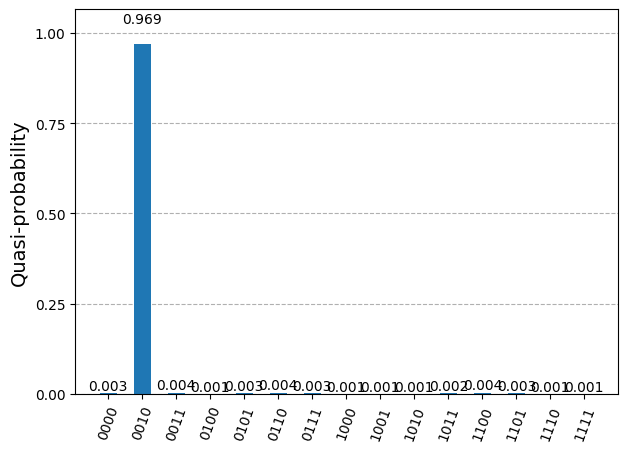

In [ ]:
counts = execute_circuit(qc, shots=1024, binary=True, mode="sampler")
plot_distribution(counts)

-----------------------------------------------------------------

b)

In [ ]:
def oracle(qr, ancilla, solution=None):

    qc = QuantumCircuit(qr,ancilla)
    cx_gate = MCXGate(len(qr),ctrl_state=solution)
    qc = qc.compose(cx_gate)

    return qc

In [ ]:
def diffusion_operator(qr, ancilla, n_qubits):

    qc = QuantumCircuit(qr,ancilla)

    qc.h(qr)
    qc.x(qr[-1])

    cz = ZGate().control(n_qubits-1,ctrl_state="0"*(n_qubits-1))
    qc = qc.compose(cz)

    qc.x(qr[-1])

    qc.h(qr)

    qc.barrier()

    return qc

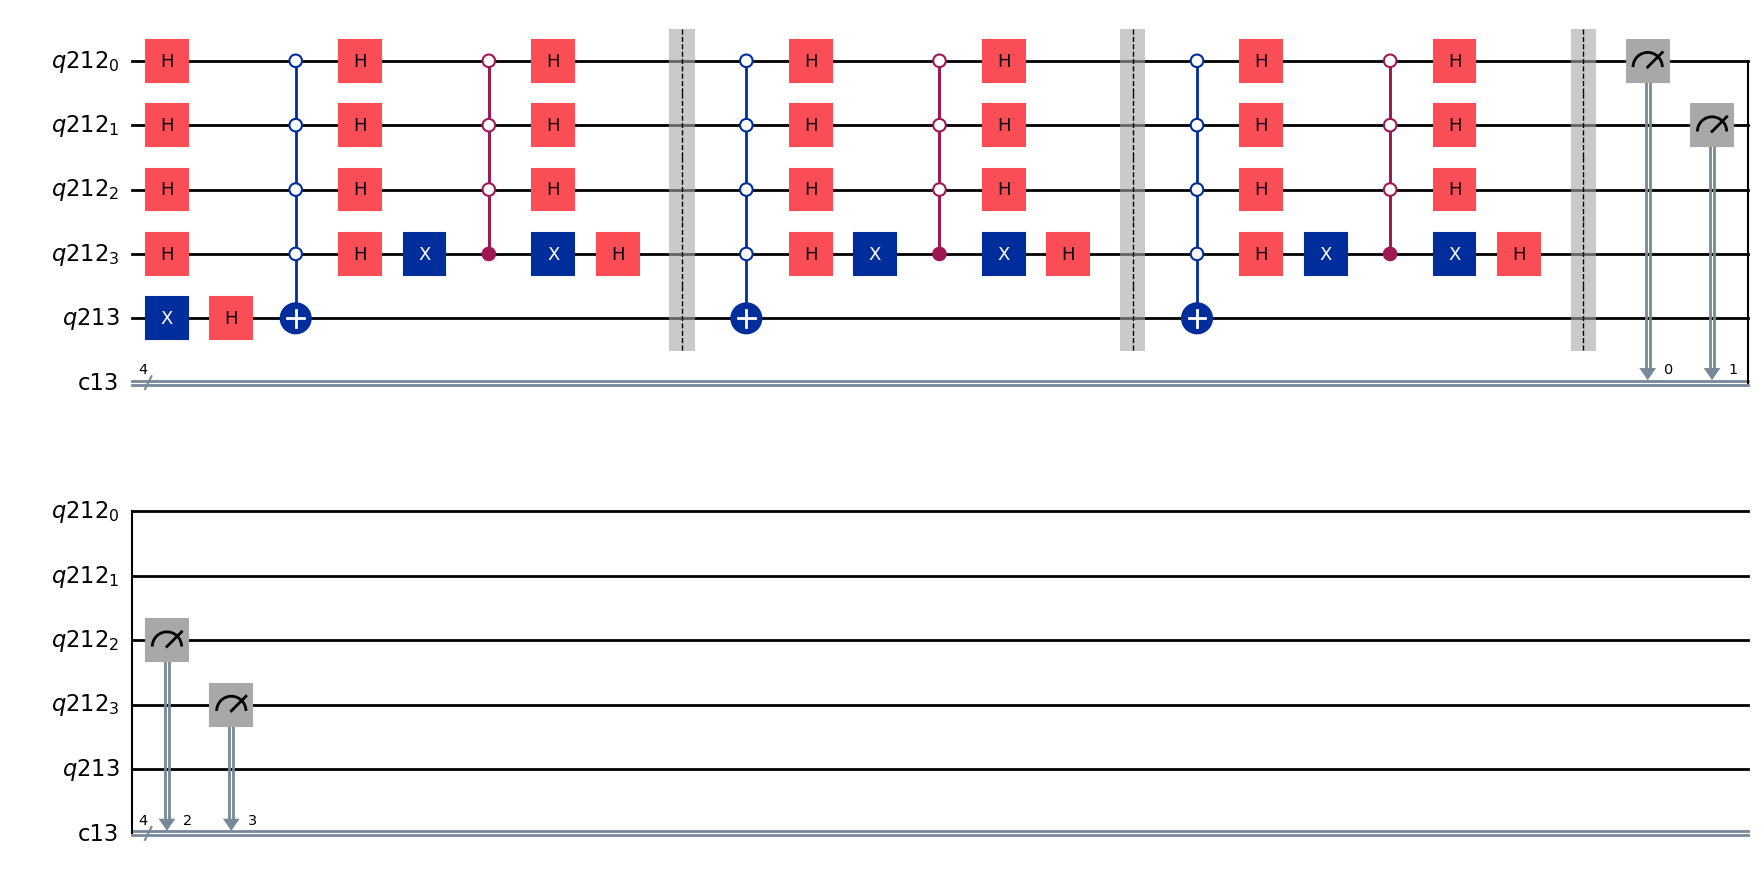

In [ ]:
def grover(solutionInput):
  # Número de qubits
  n = 4

  # Nr de combinações possiveis
  elements = 2**n

  # Iterações do ciclo
  iterations= int(np.floor(np.pi/4 * np.sqrt(elements)))


  qr=QuantumRegister(n)

  ancilla=QuantumRegister(1)

  cr=ClassicalRegister(n)

  qc = QuantumCircuit(qr,ancilla,cr)

  qc.h(qr)

  qc.x(ancilla)
  qc.h(ancilla)

  for j in range(iterations):
      qc = qc.compose(oracle(qr, ancilla, solution=solutionInput))
      qc = qc.compose(diffusion_operator(qr,ancilla,n))

  return qc,qr,cr

qc,qr,cr = grover("0000")
qc.measure(qr,cr)
qc.draw(output="mpl")


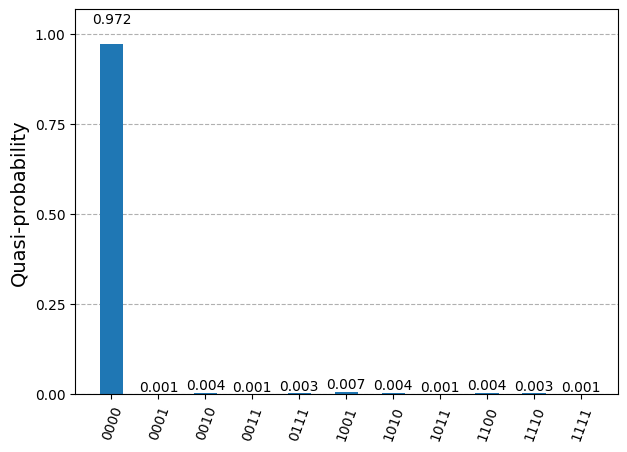

In [ ]:
counts = execute_circuit(qc, shots=1024, binary=True, mode="sampler")
plot_distribution(counts)

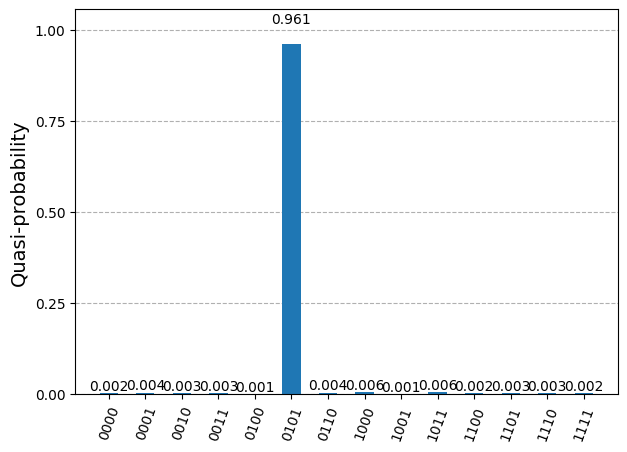

In [ ]:
qc,qr,cr = grover("0101")
qc.measure(qr,cr)
counts = execute_circuit(qc, shots=1024, binary=True, mode="sampler")
plot_distribution(counts)

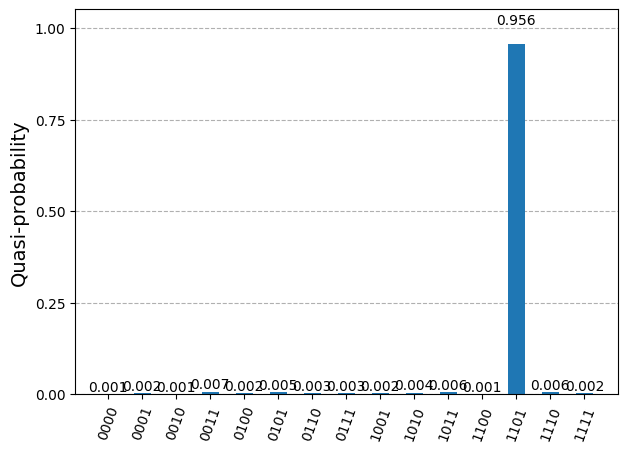

In [ ]:
qc,qr,cr = grover("1101")
qc.measure(qr,cr)
counts = execute_circuit(qc, shots=1024, binary=True, mode="sampler")
plot_distribution(counts)

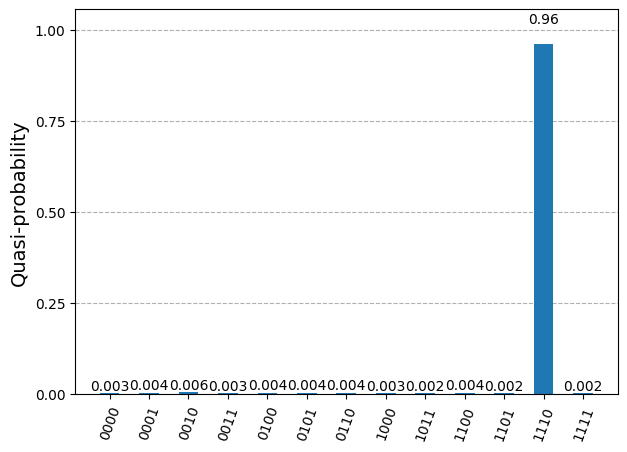

In [ ]:
qc,qr,cr = grover("1110")
qc.measure(qr,cr)
counts = execute_circuit(qc, shots=1024, binary=True, mode="sampler")
plot_distribution(counts)

---------------------------------------------------------------------

c)

In [14]:
def oracle(qr, ancilla):

    qc = QuantumCircuit(qr, ancilla)
    qc.cx(qr[-1], ancilla)
    qc.barrier()

    return qc

In [3]:
def diffusion_operator(qr, ancilla, n_qubits):

    qc = QuantumCircuit(qr,ancilla)

    qc.h(qr)
    qc.x(qr[-1])

    cz = ZGate().control(n_qubits-1,ctrl_state="0"*(n_qubits-1))
    qc = qc.compose(cz)

    qc.x(qr[-1])

    qc.h(qr)

    qc.barrier()

    return qc

Iterações: 1


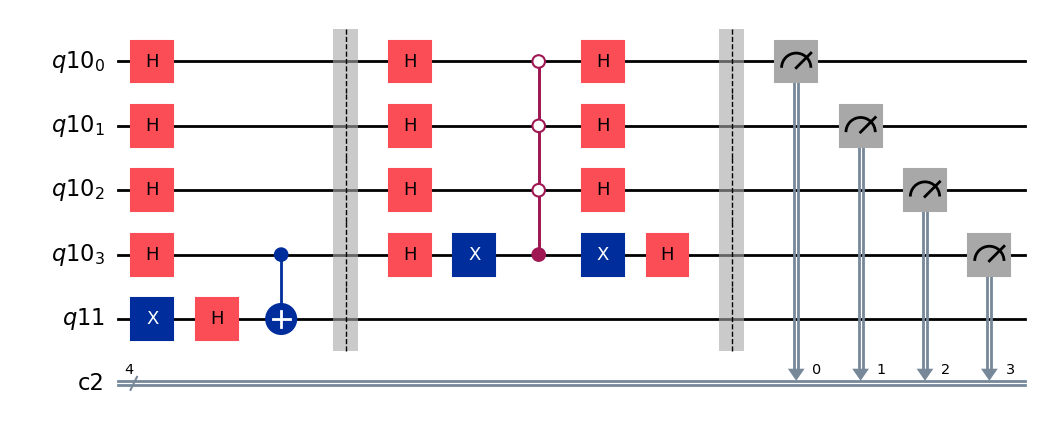

In [16]:
# Número de qubits
n = 4

# Nr de combinações possiveis
elements = 2**n

casos_possiveis = 2**(n-1)

# Iterações do ciclo
iterations= int(np.floor((np.pi/4) * (casos_possiveis / np.sqrt(elements))))
print(f"Iterações: {iterations}")


qr=QuantumRegister(n)

ancilla=QuantumRegister(1)

cr=ClassicalRegister(n)

qc = QuantumCircuit(qr,ancilla,cr)

qc.h(qr)

qc.x(ancilla)
qc.h(ancilla)

for j in range(iterations):
    qc = qc.compose(oracle(qr,ancilla))
    qc = qc.compose(diffusion_operator(qr,ancilla,n))


qc.measure(qr,cr)
qc.draw(output="mpl")

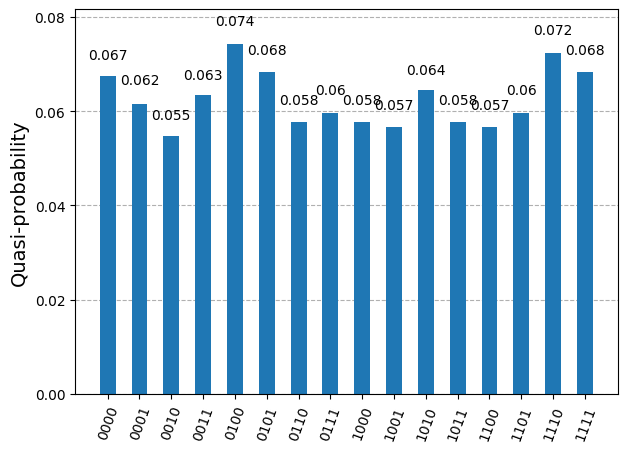

In [17]:
counts = execute_circuit(qc, shots=1024, binary=True, mode="sampler")
plot_distribution(counts)